In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
import datetime as dt

from matplotlib.colors import LinearSegmentedColormap

### Open the file

In [31]:
data_dict = pd.read_excel('20180924 A=B A cell functional screen 1.xlsx', sheet_name=None)

In [32]:
data_dict.keys()

odict_keys(['OD700', 'BFP', 'IDs', 'Exp'])

### Functions for Munging

In [33]:
def get_sec (datetimeTime_obj):
    
    return (datetimeTime_obj.hour * 60 + datetimeTime_obj.minute) * 60 + datetimeTime_obj.second

In [34]:
def replace_time (data_sheet):
    
    data_sheet['Time'] = data_sheet['Time'].apply(get_sec).divide(3600)
    
    return None

In [35]:
def replace_temp (data_sheet):
    
    c = ['Temp C' if '°' in x else x for x in data_sheet.columns]
    
    data_sheet.columns = c
    
    return None

### Do the munging

In [36]:
#do it for the OD
replace_time(data_dict['OD700'])
replace_temp(data_dict['OD700'])

#do it for BFP
replace_time(data_dict['BFP'])
replace_temp(data_dict['BFP'])

### Start the hacky part of plottingeach variant

In [37]:
def make_well_name (num):
    """
    with increasing number (zero indexed), counts down columns in a 96 well plate [A1, B1, C1...H1, A2...H2, A3...H3, ...]
    and returns this well indexer as a string.
    """
    return 'ABCDEFGH'[(num) % 8] + str(list(range(1,13))[(num) // 8])

In [38]:
def make_notebook_id (num):
    """
    Return the ID of a sample ['1-1', '2-1', '3-1'...'8-1'...'1-2'...'8-2'] based on a zero indexed number
    """
    return '12345678'[(num) % 8] + '-' + '12'[(num) // 8]

In [39]:
def well_list (start_well):
    """
    returns a list of 5 well names (strings) given the starting well (which in this exp defines the variant you want to show)
    """
    
    return [make_well_name(start_well+16*n) for n in list(range(0,6))]

In [40]:
od = data_dict['OD700']

bfp = data_dict['BFP']

In [22]:
#Make a custom colormap to avoid loopy plotting. Instead just apply a custom cmap to the lines to get everything colored right
b = plt.get_cmap('Blues')
r = plt.get_cmap('OrRd')

colors = [b(m) for m in np.linspace(0.35,1,4)] + [r(m) for m in np.linspace(0.5,1,2)]

n_bins = 6 #there are 6 lines in these particular plots, so just take all 6 of the colors I've already given the colors var

DwnUp = LinearSegmentedColormap.from_list('DwnUp', colors, N=n_bins)

In [23]:
legend_entries = ['0 IPTG', '12.5uM IPTG', '187uM IPTG', '1mM IPTG', '1mM IPTG + 1nM Rpa', '1mM IPTG + 100nM Rpa']

In [24]:
#we have variants 1-16, let's create a list of those numbers and a way to use that number to reference each well it's in

var = list(range(0,16))

#### The below cell should be used for plotting raw OD or FLUOR data, without any comparisons or means etc

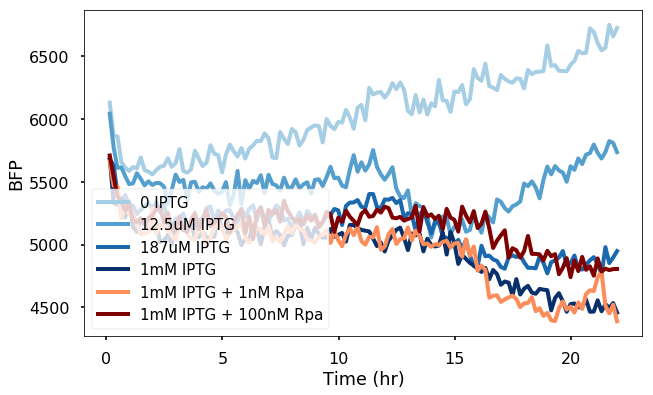

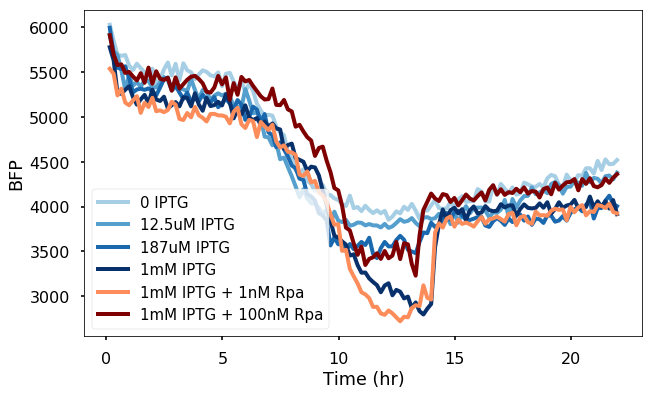

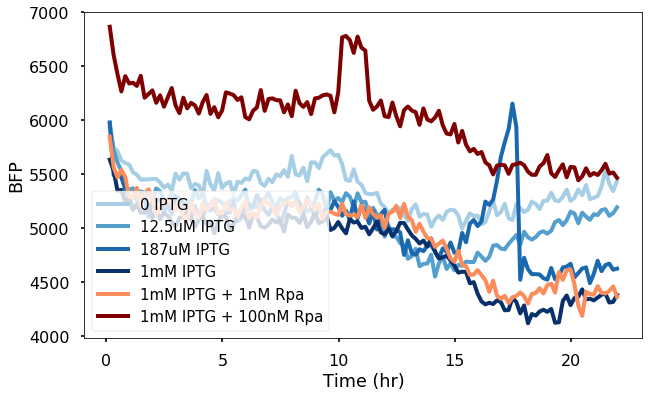

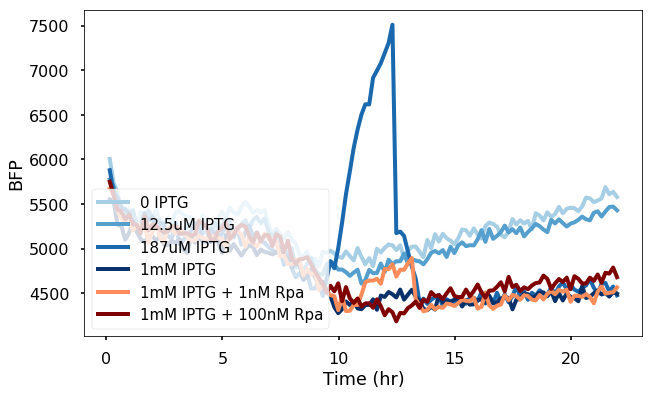

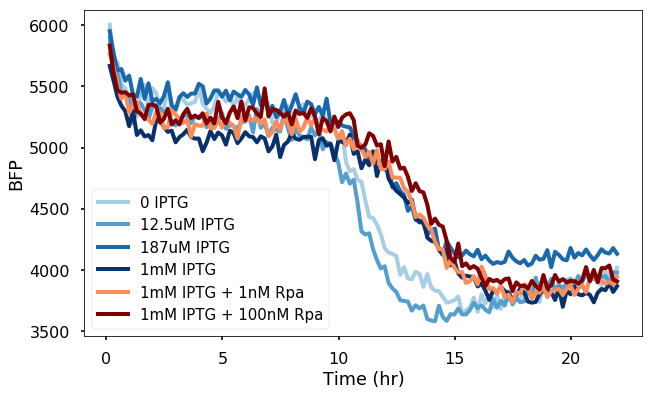

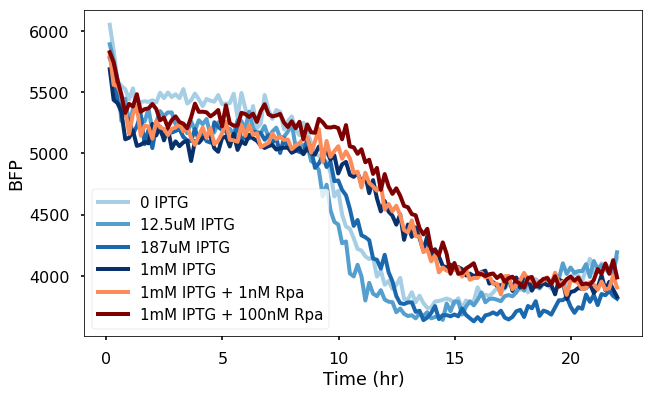

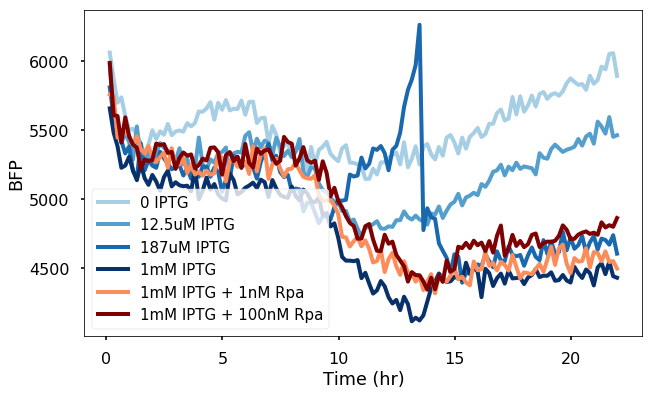

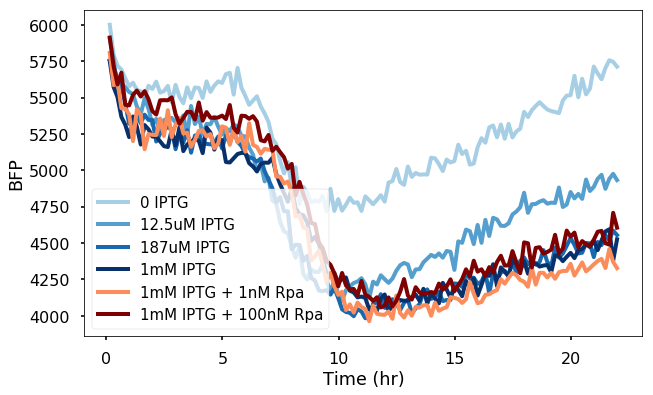

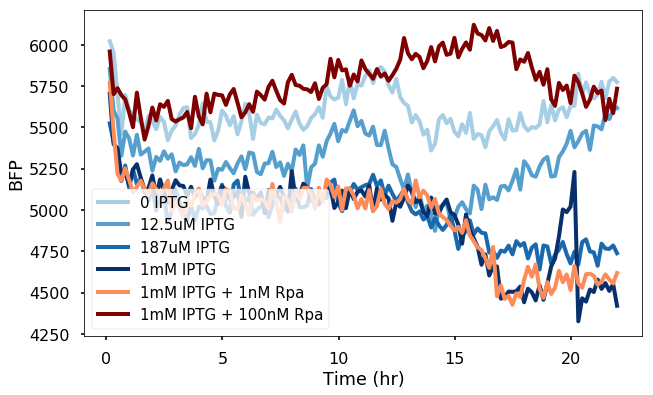

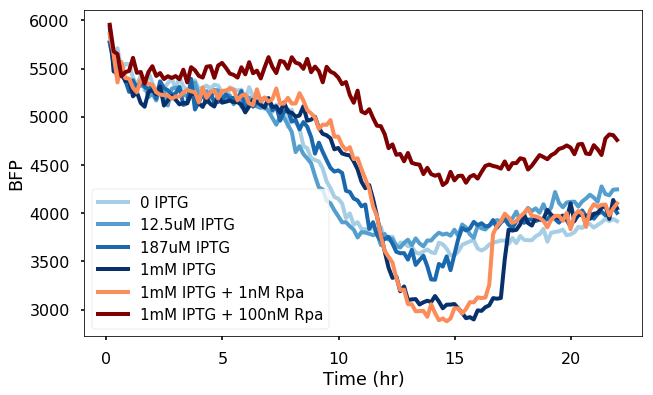

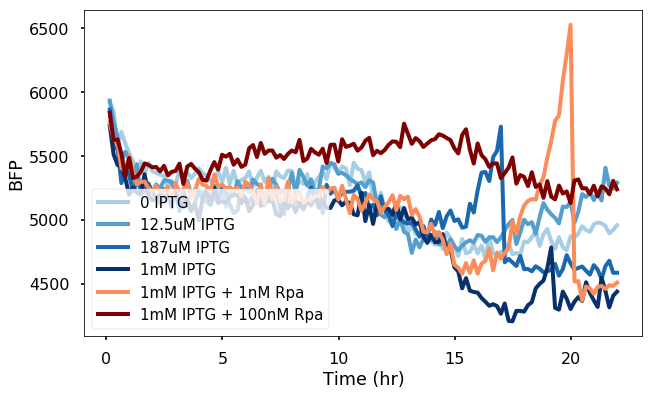

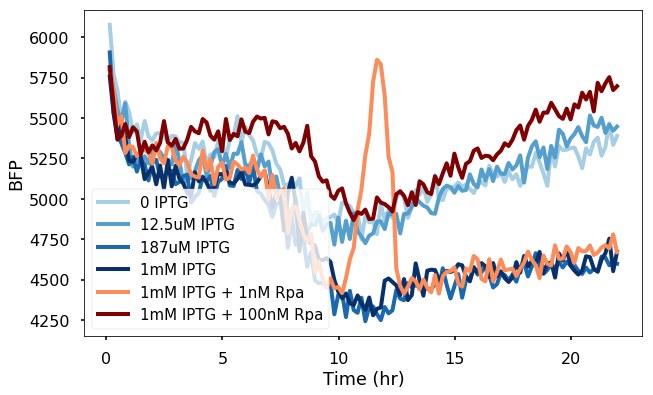

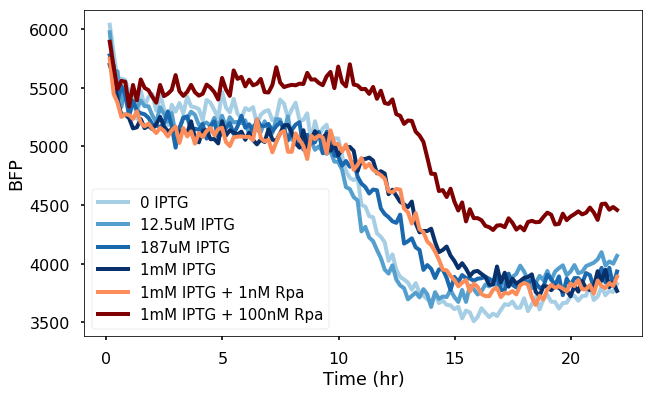

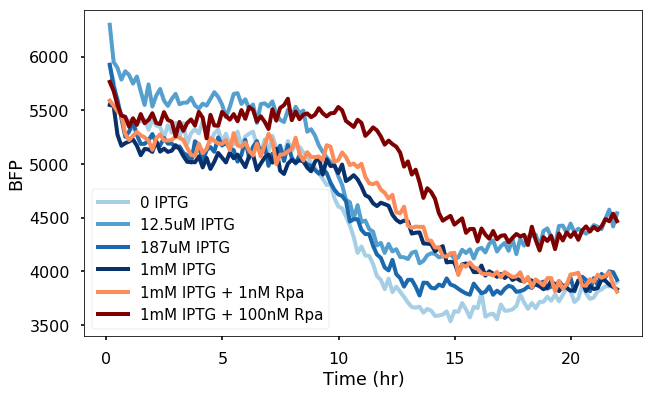

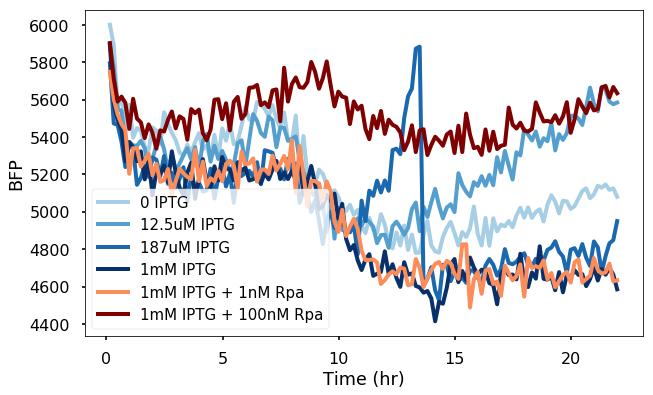

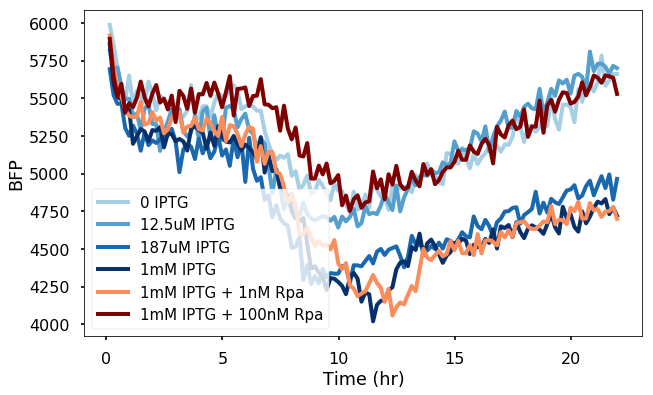

In [28]:
for v in var:
    #quick way to get tick labels the size I want
    sns.set_context("poster")

    #do plotting
    bfp[['Time'] + well_list(v)].plot(x='Time', colormap=DwnUp, figsize=(10,6), linewidth=4, legend=False)

    #aesthetics
    plt.legend(legend_entries, fontsize=15, loc='lower left')
    plt.xlabel('Time (hr)')
    plt.ylabel('BFP')

    #plt.savefig('A' + make_notebook_id(v) + '_CapnResc_rawBFP.pdf')

#### The below cell is similar to the one above, but divides FLUOR by OD700 to get "normalized" fluorescence

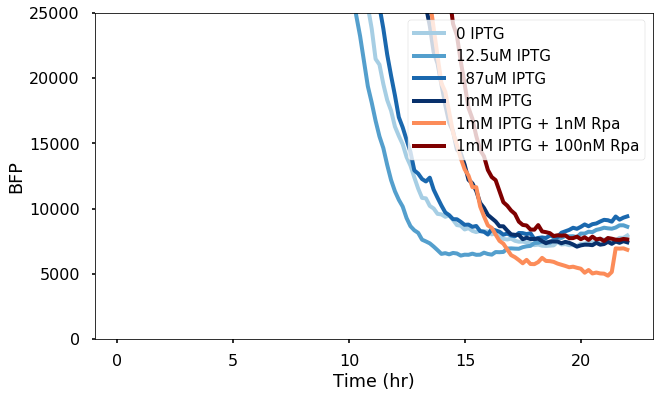

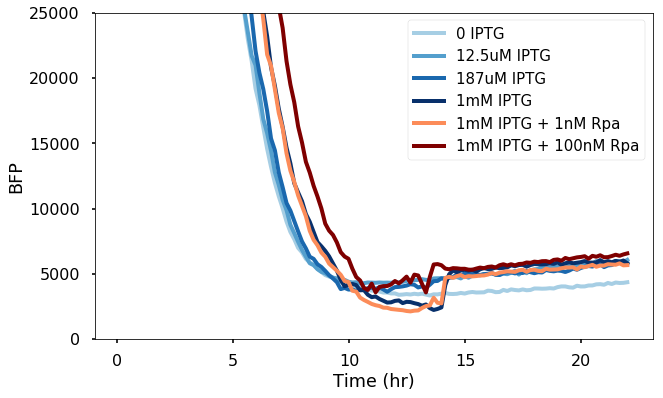

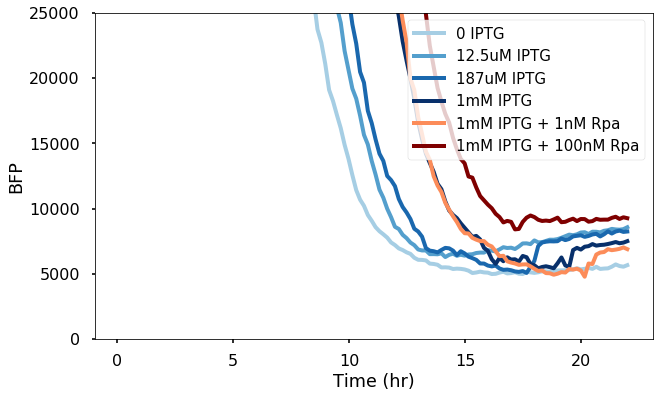

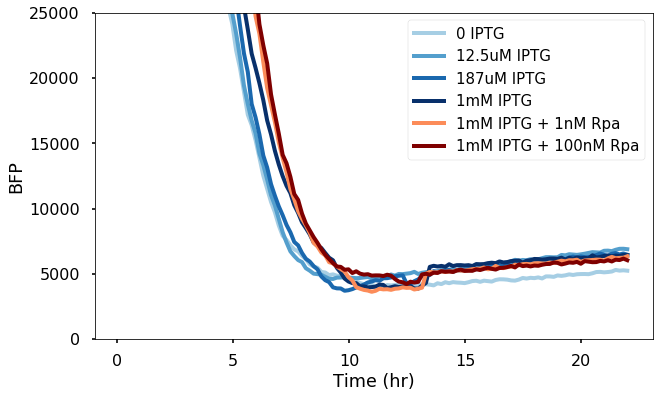

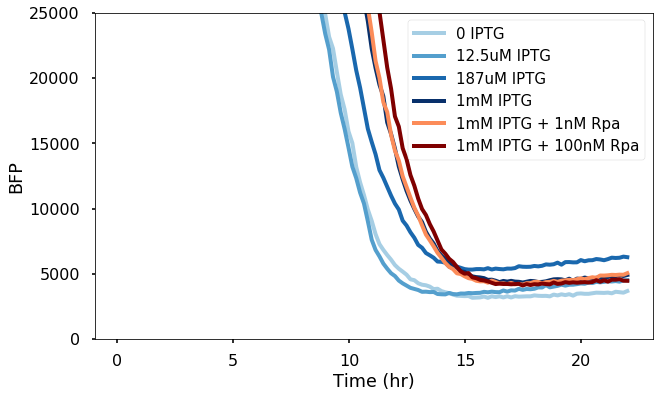

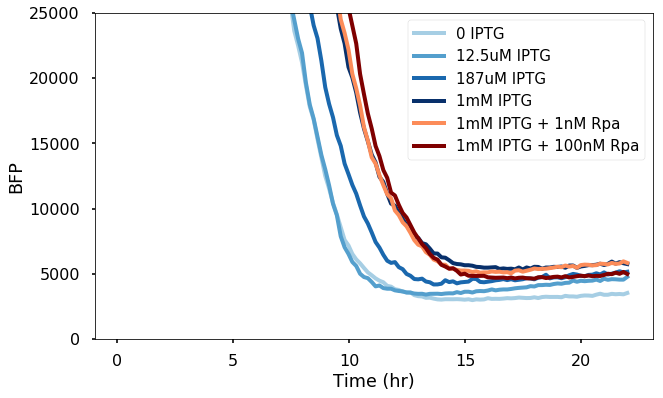

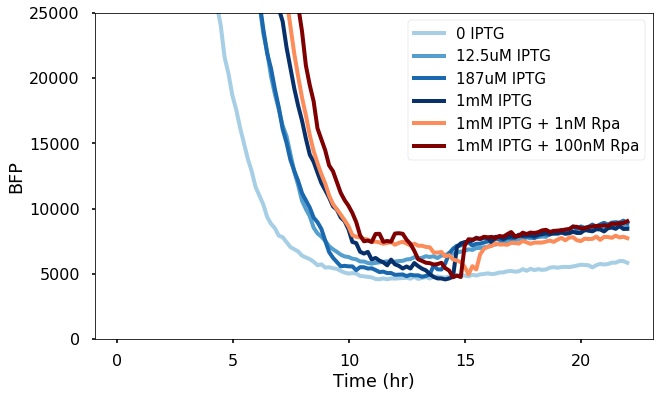

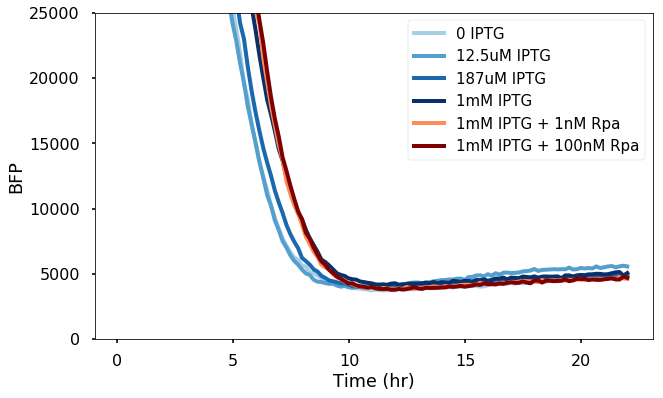

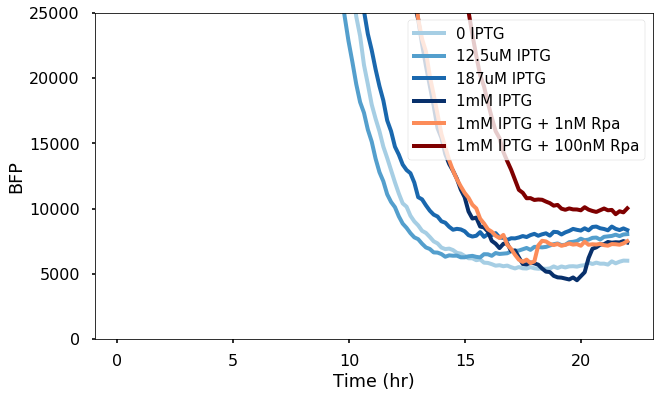

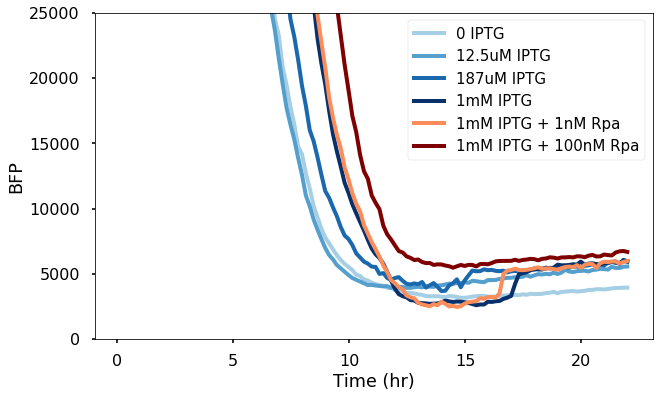

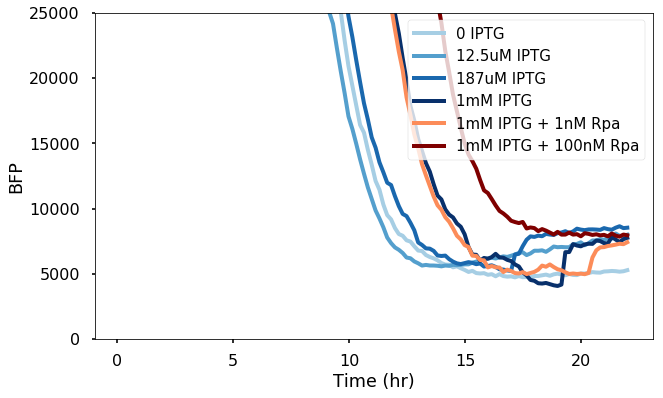

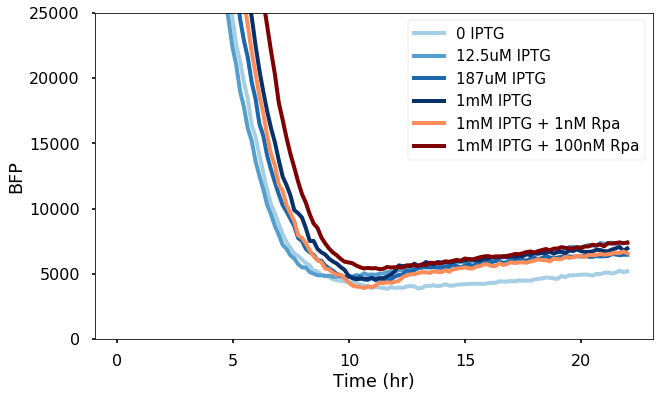

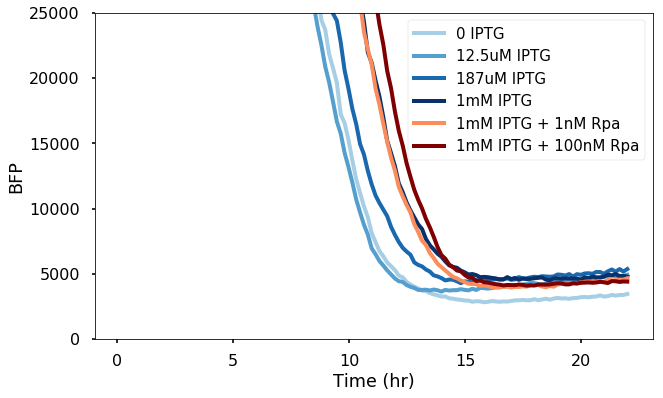

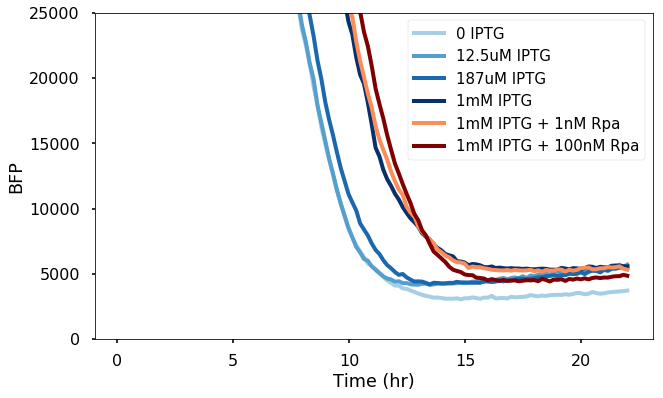

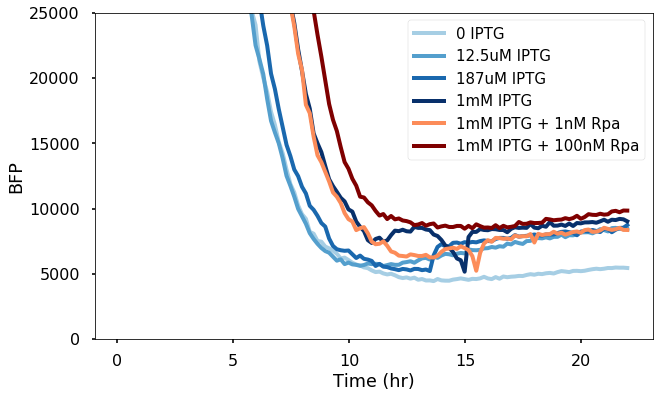

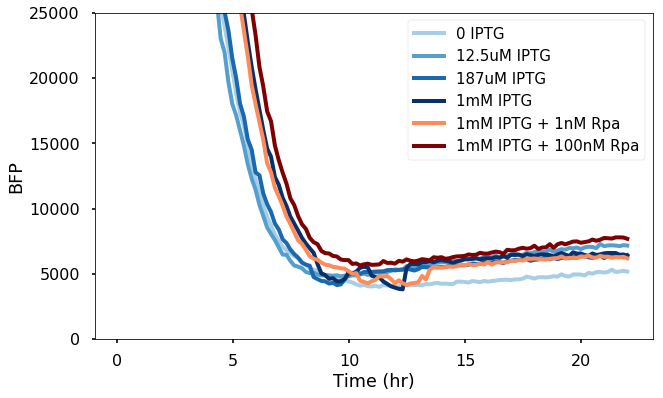

In [66]:
for v in var:
    #quick way to get tick labels the size I want
    sns.set_context("poster")

    #do plotting
    (
    (bfp[well_list(v)] / od[well_list(v)])
        .assign(Time=od['Time'])
        .plot(x='Time', colormap=DwnUp, figsize=(10,6), linewidth=4, legend=False)
    )
    
    #optional y axis limits to see dynamic range at end of exp
    #plt.ylim(0, 25000)

    #aesthetics
    plt.legend(legend_entries, fontsize=15, loc='upper right')
    plt.xlabel('Time (hr)')
    plt.ylabel('BFP')

    #plt.savefig('A' + make_notebook_id(v) + '_CapnResc_BFPnormOD.pdf')